<a href="https://colab.research.google.com/github/pingping-0606/bsc_dpdm24/blob/main/Final_project_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Member

In [178]:
import io
import pandas as pd
pd.read_csv(io.StringIO('''
1,653020205-1 ,นางสาวณัชชา ประทุมชาติ
2,653020206-9 ,นางสาวณัฎฐ์กฤตา ไชยโกฏิ
3,653020567-7 ,นางสาวกัลยรัตน์ อินทร์สำสำราญ

'''), header=None).rename(columns={0:'ลำดับ', 1:'รหัสนักศึกษา', 2:'ชื่อ-สกุล'})

,ลำดับ,รหัสนักศึกษา,ชื่อ-สกุล
0,1,653020205-1,นางสาวณัชชา ประทุมชาติ
1,2,653020206-9,นางสาวณัฎฐ์กฤตา ไชยโกฏิ
2,3,653020567-7,นางสาวกัลยรัตน์ อินทร์สำสำราญ


#import data

In [188]:
!pip install kagglehub

In [189]:
import os

In [190]:
import kagglehub

# Download latest version
# Modified to include only the dataset handle
path = kagglehub.dataset_download("deepu1109/star-dataset")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/deepu1109/star-dataset/versions/1


In [191]:
import pandas as pd

In [192]:
import kagglehub
import zipfile
import os
import pandas as pd

# Extract dataset if it's a ZIP file
for file in os.listdir(path):
    if file.endswith(".zip"):
        with zipfile.ZipFile(os.path.join(path, file), 'r') as zip_ref:
            zip_ref.extractall(path)
        print(f"Extracted: {file}")

# List extracted files
extracted_files = os.listdir(path)
print("Extracted files:", extracted_files)

# Load CSV file into DataFrame
for file in extracted_files:
    if file.endswith(".csv"):
        star  = pd.read_csv(os.path.join(path, file))
        # Use 'df' instead of 'restaurant' to access the DataFrame
        print(f"Loaded {file} with shape: {star.shape}")
        print(star.head())  # Show first few rows

Extracted files: ['6 class csv.csv']
Loaded 6 class csv.csv with shape: (240, 7)
   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class  
0          0        Red              M  
1          0        Red              M  
2          0        Red              M  
3          0        Red              M  
4          0        Red              M  


In [193]:
print(star.info())
print(star.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Temperature (K)         240 non-null    int64  
 1   Luminosity(L/Lo)        240 non-null    float64
 2   Radius(R/Ro)            240 non-null    float64
 3   Absolute magnitude(Mv)  240 non-null    float64
 4   Star type               240 non-null    int64  
 5   Star color              240 non-null    object 
 6   Spectral Class          240 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 13.3+ KB
None
       Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  \
count       240.000000        240.000000    240.000000   
mean      10497.462500     107188.361635    237.157781   
std        9552.425037     179432.244940    517.155763   
min        1939.000000          0.000080      0.008400   
25%        3344.250000          0.000865      0.102750   
50%

#เช็คค่า missing

In [194]:
star.isnull().sum()

,0
Temperature (K),0
Luminosity(L/Lo),0
Radius(R/Ro),0
Absolute magnitude(Mv),0
Star type,0
Star color,0
Spectral Class,0


# Association

In [195]:
star

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M
...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O
237,8829,537493.000000,1423.0000,-10.73,5,White,A
238,9235,404940.000000,1112.0000,-11.23,5,White,A


In [196]:

# Step 1: Categorize continuous data (Temperature, Luminosity, Radius)
def categorize(value, bins, labels):
    return pd.cut([value], bins=bins, labels=labels)[0]

# Binning temperature and luminosity into categories
temp_bins = [0, 4000, 7000, 10000, 20000, 30000, 40000]
temp_labels = ['Very Cold', 'Cold', 'Medium', 'Hot', 'Very Hot', 'Extremely Hot']

luminosity_bins = [0, 0.1, 1, 10, 100, 1000, 10000]
luminosity_labels = ['Very Low', 'Low', 'Medium', 'High', 'Very High', 'Extremely High']

radius_bins = [0, 1, 2, 3, 4, 5]
radius_labels = ['Very Small', 'Small', 'Medium', 'Large', 'Very Large']

star['Temperature Category'] = star['Temperature (K)'].apply(lambda x: categorize(x, temp_bins, temp_labels))
star['Luminosity Category'] = star['Luminosity(L/Lo)'].apply(lambda x: categorize(x, luminosity_bins, luminosity_labels))
star['Radius Category'] = star['Radius(R/Ro)'].apply(lambda x: categorize(x, radius_bins, radius_labels))

# Categorizing Absolute Magnitude based on its value
star['Magnitude Category'] = star['Absolute magnitude(Mv)'].apply(lambda x: 'Bright' if x < 0 else 'Dim')


In [197]:
print(star.head())

   Temperature (K)  Luminosity(L/Lo)  Radius(R/Ro)  Absolute magnitude(Mv)  \
0             3068          0.002400        0.1700                   16.12   
1             3042          0.000500        0.1542                   16.60   
2             2600          0.000300        0.1020                   18.70   
3             2800          0.000200        0.1600                   16.65   
4             1939          0.000138        0.1030                   20.06   

   Star type Star color Spectral Class Temperature Category  \
0          0        Red              M            Very Cold   
1          0        Red              M            Very Cold   
2          0        Red              M            Very Cold   
3          0        Red              M            Very Cold   
4          0        Red              M            Very Cold   

  Luminosity Category Radius Category Magnitude Category  
0            Very Low      Very Small                Dim  
1            Very Low      Very Sm

In [198]:
# แปลงข้อมูลให้เป็นรายการของ transactions
transactions = []

for _, row in star.iterrows():
    # สร้างรายการของ items (โดยแปลงทุกคอลัมน์ที่เป็นค่า categorical เป็น string)
    transaction = [
        f"Temperature Category = {row['Temperature Category']}",
        f"Luminosity Category = {row['Luminosity Category']}",
        f"Radius Category = {row['Radius Category']}",
        f"Magnitude Category = {row['Magnitude Category']}",
        f"Star Color = {row['Star color']}",
        f"Spectral Class = {row['Spectral Class']}",
        f"Star Type = {row['Star type']}"
    ]
    transactions.append(transaction)


In [199]:
transactions

[['Temperature Category = Very Cold',
  'Luminosity Category = Very Low',
  'Radius Category = Very Small',
  'Magnitude Category = Dim',
  'Star Color = Red',
  'Spectral Class = M',
  'Star Type = 0'],
 ['Temperature Category = Very Cold',
  'Luminosity Category = Very Low',
  'Radius Category = Very Small',
  'Magnitude Category = Dim',
  'Star Color = Red',
  'Spectral Class = M',
  'Star Type = 0'],
 ['Temperature Category = Very Cold',
  'Luminosity Category = Very Low',
  'Radius Category = Very Small',
  'Magnitude Category = Dim',
  'Star Color = Red',
  'Spectral Class = M',
  'Star Type = 0'],
 ['Temperature Category = Very Cold',
  'Luminosity Category = Very Low',
  'Radius Category = Very Small',
  'Magnitude Category = Dim',
  'Star Color = Red',
  'Spectral Class = M',
  'Star Type = 0'],
 ['Temperature Category = Very Cold',
  'Luminosity Category = Very Low',
  'Radius Category = Very Small',
  'Magnitude Category = Dim',
  'Star Color = Red',
  'Spectral Class = M',


In [200]:
results = apriori(transactions, min_support=0.5)

# เรียงลำดับตามค่า support จากมากไปน้อย
sorted_results = sorted(results, key=lambda x: x.support, reverse=True)


# แสดงผลลัพธ์ที่เรียงแล้ว
for result in sorted_results:
    items = list(result.items)
    if len(items) > 1:
        print(f"Frequent Itemset: {items}")
        print(f"Support: {result.support}")
        print("="*30)

Frequent Itemset: ['Magnitude Category = Dim', 'Radius Category = Very Small']
Support: 0.5291666666666667
Frequent Itemset: ['Luminosity Category = Very Low', 'Magnitude Category = Dim']
Support: 0.5041666666666667
Frequent Itemset: ['Luminosity Category = Very Low', 'Radius Category = Very Small']
Support: 0.5041666666666667
Frequent Itemset: ['Luminosity Category = Very Low', 'Magnitude Category = Dim', 'Radius Category = Very Small']
Support: 0.5041666666666667


In [201]:
sorted_results

[RelationRecord(items=frozenset({'Magnitude Category = Dim'}), support=0.575, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Magnitude Category = Dim'}), confidence=0.575, lift=1.0)]),
 RelationRecord(items=frozenset({'Radius Category = Very Small'}), support=0.5291666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Radius Category = Very Small'}), confidence=0.5291666666666667, lift=1.0)]),
 RelationRecord(items=frozenset({'Magnitude Category = Dim', 'Radius Category = Very Small'}), support=0.5291666666666667, ordered_statistics=[OrderedStatistic(items_base=frozenset(), items_add=frozenset({'Magnitude Category = Dim', 'Radius Category = Very Small'}), confidence=0.5291666666666667, lift=1.0), OrderedStatistic(items_base=frozenset({'Magnitude Category = Dim'}), items_add=frozenset({'Radius Category = Very Small'}), confidence=0.9202898550724639, lift=1.7391304347826089), OrderedStatistic(items_base=frozen

# Model

In [ ]:
star

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class,Temperature Category,Luminosity Category,Radius Category,Magnitude Category
0,3068,0.002400,0.1700,16.12,0,Red,M,Very Cold,Very Low,Very Small,Dim
1,3042,0.000500,0.1542,16.60,0,Red,M,Very Cold,Very Low,Very Small,Dim
2,2600,0.000300,0.1020,18.70,0,Red,M,Very Cold,Very Low,Very Small,Dim
3,2800,0.000200,0.1600,16.65,0,Red,M,Very Cold,Very Low,Very Small,Dim
4,1939,0.000138,0.1030,20.06,0,Red,M,Very Cold,Very Low,Very Small,Dim
...,...,...,...,...,...,...,...,...,...,...,...
235,38940,374830.000000,1356.0000,-9.93,5,Blue,O,Extremely Hot,NaN,NaN,Bright
236,30839,834042.000000,1194.0000,-10.63,5,Blue,O,Extremely Hot,NaN,NaN,Bright
237,8829,537493.000000,1423.0000,-10.73,5,White,A,Medium,NaN,NaN,Bright
238,9235,404940.000000,1112.0000,-11.23,5,White,A,Medium,NaN,NaN,Bright


In [ ]:
for_model = star[['Temperature (K)','Luminosity(L/Lo)','Radius(R/Ro)','Absolute magnitude(Mv)','Star type','Star color','Spectral Class']]

In [ ]:
for_model.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [ ]:
for_model.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


In [ ]:
# ลบช่องว่างที่ไม่จำเป็นออกจากชื่อคอลัมน์ทั้งหมด
for_model.columns = for_model.columns.str.strip()

In [ ]:
for_model.columns

Index(['Temperature (K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolute magnitude(Mv)', 'Star type', 'Star color', 'Spectral Class'],
      dtype='object')

In [ ]:
# ลบช่องว่างทั้งหมดภายในชื่อคอลัมน์
for_model.columns = for_model.columns.str.replace(' ', '', regex=True)

In [ ]:
for_model.columns

Index(['Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)',
       'Absolutemagnitude(Mv)', 'Startype', 'Starcolor', 'SpectralClass'],
      dtype='object')

In [ ]:
from sklearn.model_selection import cross_val_score, cross_val_predict, StratifiedKFold
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix

In [ ]:
# Prepare the features (X) and target variable (y)
X = for_model[['Temperature(K)', 'Luminosity(L/Lo)', 'Radius(R/Ro)', 'Absolutemagnitude(Mv)']]
y = for_model['SpectralClass']

# Convert categorical variables to numeric (if necessary)
y_encoded = pd.factorize(y)[0]  # Converts Spectral Class into numeric labels

# แปลง Label เป็นตัวเลข
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# ใช้ Stratified K-Fold Cross Validation (K=5)
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# สร้างโมเดล
models = {
    'SVM': SVC(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Naive Bayes': GaussianNB()
}

# Train & Evaluate แต่ละโมเดลโดยใช้ Cross-Validation
for model_name, model in models.items():
    print(f"🔹 Model: {model_name}")

    # คำนวณ KPI โดยใช้ Cross-Validation
    accuracy = cross_val_score(model, X, y_encoded, cv=kf, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y_encoded, cv=kf, scoring='precision_weighted').mean()
    recall = cross_val_score(model, X, y_encoded, cv=kf, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y_encoded, cv=kf, scoring='f1_weighted').mean()

    # ทำนายค่า y แบบ cross-validation
    y_pred = cross_val_predict(model, X, y_encoded, cv=kf)

    # แสดงค่า KPI
    print(f"✔ Accuracy: {accuracy:.4f}")
    print(f"✔ Precision: {precision:.4f}")
    print(f"✔ Recall: {recall:.4f}")
    print(f"✔ F1 Score: {f1:.4f}")

    # แสดง Confusion Matrix
    print("🔍 Confusion Matrix:")
    cm = confusion_matrix(y_encoded, y_pred)
    print(cm)

    print("="*60)


🔹 Model: SVM
✔ Accuracy: 0.5042
✔ Precision: 0.3146
✔ Recall: 0.5042
✔ F1 Score: 0.3843
🔍 Confusion Matrix:
[[ 0  0  0  0  0 17  2]
 [ 0  0  0  0  0 40  6]
 [ 0  0  0  0  0 17  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  4  2]
 [ 0  0  0  0  0 93 18]
 [ 0  0  0  0  0 12 28]]
🔹 Model: Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

✔ Accuracy: 0.8958
✔ Precision: 0.8986
✔ Recall: 0.8958
✔ F1 Score: 0.8875
🔍 Confusion Matrix:
[[ 14   1   2   0   0   0   2]
 [  3  36   0   1   0   0   6]
 [  1   0  15   0   1   0   0]
 [  1   0   0   0   0   0   0]
 [  0   1   2   0   2   1   0]
 [  0   0   0   0   0 111   0]
 [  0   3   0   0   0   0  37]]
🔹 Model: Decision Tree
✔ Accuracy: 0.9000
✔ Precision: 0.9189
✔ Recall: 0.9000
✔ F1 Score: 0.8998
🔍 Confusion Matrix:
[[ 14   1   4   0   0   0   0]
 [  1  38   2   1   0   0   4]
 [  2   1  13   0   1   0   0]
 [  1   0   0   0   0   0   0]
 [  0   1   0   1   4   0   0]
 [  0   0   0   0   0 111   0]
 [  1   3   0   0   0   0  36]]
🔹 Model: Naive Bayes
✔ Accuracy: 0.4042
✔ Precision: 0.7409
✔ Recall: 0.4042
✔ F1 Score: 0.4200
🔍 Confusion Matrix:
[[ 5  3  9  0  0  0  2]
 [ 1 11 23  0  0  0 11]
 [ 0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  0  4  0  0  0  2]
 [ 0  0 80  0  1 30  0]
 [ 1  5  0  0  0  0 34]]


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recal

In [ ]:
import pandas as pd

# สร้าง DataFrame ว่างเพื่อเก็บผลลัพธ์
results = []

# Train & Evaluate แต่ละโมเดลโดยใช้ Cross-Validation
for model_name, model in models.items():
    print(f"🔹 Model: {model_name}")

    # คำนวณ KPI โดยใช้ Cross-Validation
    accuracy = cross_val_score(model, X, y_encoded, cv=kf, scoring='accuracy').mean()
    precision = cross_val_score(model, X, y_encoded, cv=kf, scoring='precision_weighted').mean()
    recall = cross_val_score(model, X, y_encoded, cv=kf, scoring='recall_weighted').mean()
    f1 = cross_val_score(model, X, y_encoded, cv=kf, scoring='f1_weighted').mean()

    # ทำนายค่า y แบบ cross-validation
    y_pred = cross_val_predict(model, X, y_encoded, cv=kf)

    # แสดงค่า KPI
    print(f"✔ Accuracy: {accuracy:.4f}")
    print(f"✔ Precision: {precision:.4f}")
    print(f"✔ Recall: {recall:.4f}")
    print(f"✔ F1 Score: {f1:.4f}")

    # แสดง Confusion Matrix
    print("🔍 Confusion Matrix:")
    cm = confusion_matrix(y_encoded, y_pred)
    print(cm)

    # เก็บผลลัพธ์ลงใน DataFrame
    results.append({
        'Model': model_name,
        'Accuracy': accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'Confusion Matrix': cm.tolist()  # แปลงเป็น list เพื่อให้แสดงใน DataFrame
    })

    print("="*60)

# สร้าง DataFrame จากผลลัพธ์
results_df = pd.DataFrame(results)

# แสดง DataFrame ที่เก็บผลลัพธ์
print(results_df)


🔹 Model: SVM
✔ Accuracy: 0.5042
✔ Precision: 0.3146
✔ Recall: 0.5042
✔ F1 Score: 0.3843
🔍 Confusion Matrix:
[[ 0  0  0  0  0 17  2]
 [ 0  0  0  0  0 40  6]
 [ 0  0  0  0  0 17  0]
 [ 0  0  0  0  0  1  0]
 [ 0  0  0  0  0  4  2]
 [ 0  0  0  0  0 93 18]
 [ 0  0  0  0  0 12 28]]
🔹 Model: Random Forest


/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is

✔ Accuracy: 0.8958
✔ Precision: 0.8986
✔ Recall: 0.8958
✔ F1 Score: 0.8875
🔍 Confusion Matrix:
[[ 14   1   2   0   0   0   2]
 [  3  36   0   1   0   0   6]
 [  1   0  15   0   1   0   0]
 [  1   0   0   0   0   0   0]
 [  0   1   2   0   2   1   0]
 [  0   0   0   0   0 111   0]
 [  0   3   0   0   0   0  37]]
🔹 Model: Decision Tree
✔ Accuracy: 0.9000
✔ Precision: 0.9189
✔ Recall: 0.9000
✔ F1 Score: 0.8998
🔍 Confusion Matrix:
[[ 14   1   4   0   0   0   0]
 [  1  38   2   1   0   0   4]
 [  2   1  13   0   1   0   0]
 [  1   0   0   0   0   0   0]
 [  0   1   0   1   4   0   0]
 [  0   0   0   0   0 111   0]
 [  1   3   0   0   0   0  36]]
🔹 Model: Naive Bayes
✔ Accuracy: 0.4042
✔ Precision: 0.7409
✔ Recall: 0.4042
✔ F1 Score: 0.4200
🔍 Confusion Matrix:
[[ 5  3  9  0  0  0  2]
 [ 1 11 23  0  0  0 11]
 [ 0  0 17  0  0  0  0]
 [ 0  0  0  0  0  0  1]
 [ 0  0  4  0  0  0  2]
 [ 0  0 80  0  1 30  0]
 [ 1  5  0  0  0  0 34]]
           Model  Accuracy  Precision    Recall  F1 Score  \
0    

/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recal

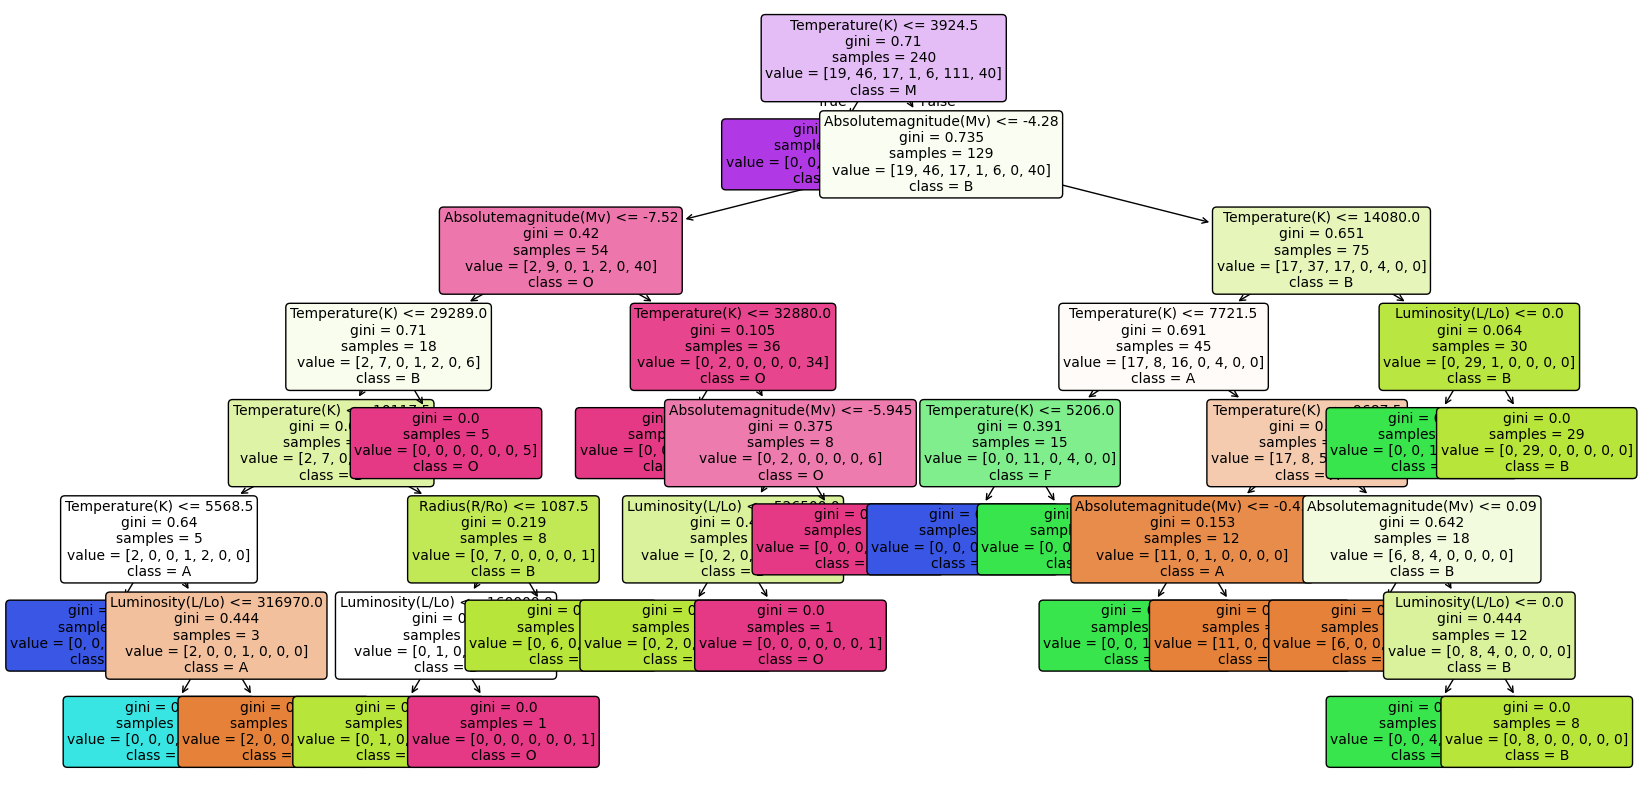

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
from sklearn.tree import DecisionTreeClassifier

# สร้างโมเดล Decision Tree
model = DecisionTreeClassifier(random_state=42)

# ฝึกฝนโมเดล
model.fit(X, y_encoded)

# วาดต้นไม้
plt.figure(figsize=(20, 10))
plot_tree(model, filled=True, feature_names=X.columns, class_names=le.classes_, rounded=True, fontsize=10)
plt.show()

In [ ]:
!pip install graphviz pydotplus

In [ ]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
import pydotplus
from google.colab import files

# สร้างและฝึกโมเดล Decision Tree
model = DecisionTreeClassifier(random_state=42)
model.fit(X, y_encoded)

# สร้างไฟล์ .dot จากโมเดล
dot_data = export_graphviz(model, out_file=None,
                           feature_names=X.columns,
                           class_names=le.classes_,
                           filled=True, rounded=True, special_characters=True)

# สร้างและแสดงต้นไม้
graph = Source(dot_data)

# แสดงใน Colab โดยตรง
graph

# หรือสามารถดาวน์โหลดภาพต้นไม้ที่สร้างไว้ได้
graph.render("decision_tree", format="png")  # เปลี่ยนเป็น 'pdf' หรือ 'svg' ได้
files.download("decision_tree.png")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

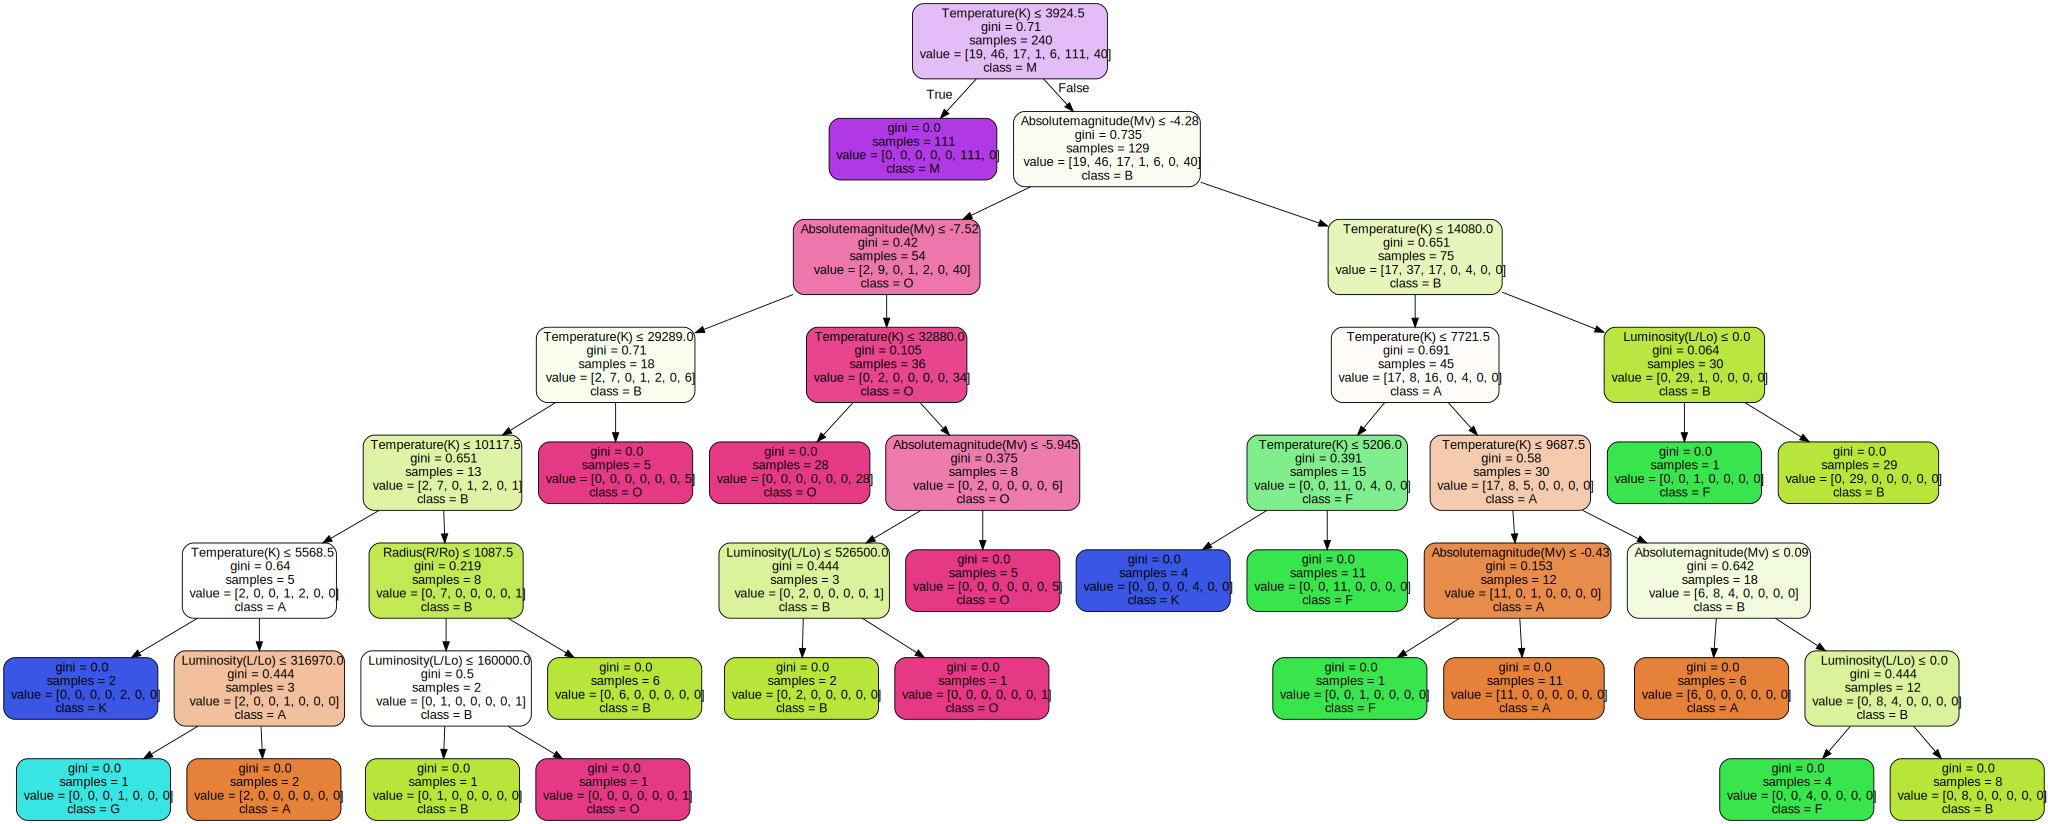

In [ ]:
graph